In [1]:
print("Hello World")

Hello World


In [2]:
a = str(input("Enter yout name"))
a

Enter yout name Kashyap


' Kashyap'

In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

### How to Handle duplicates

In [4]:
 df1 = DataFrame({
     'Key1':['A','A','A','B','B'],
     'Key2':[2,2,3,3,3]
 })
df1

,Key1,Key2
0,A,2
1,A,2
2,A,3
3,B,3
4,B,3


In [5]:
df1.duplicated()

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [6]:
df1.duplicated(keep='last')

0     True
1    False
2    False
3     True
4    False
dtype: bool

In [7]:
df1.duplicated(keep=False) # Only unique row will not be 

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [8]:
df1.drop_duplicates()

,Key1,Key2
0,A,2
2,A,3
3,B,3


In [9]:
df1.drop_duplicates(keep=False)

,Key1,Key2
2,A,3


### Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df1 = sns.load_dataset('tips')

In [12]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
df1.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [14]:
df1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [16]:
df1.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Describle gives whether data is skewed or not, mean and median of it, Quartile of it etc

IQR = 75% - 25% Quartiles
    = 24.127-13.345
    = 11

UL (Upper Limit) = Q3 + 1.5 * IQR
                  = 24 + 1.5 * 11
                  = 40.5

LL (Lower Limit) = Q1 + 1.5 * IQR
                 = 13 + 1.5 * 11
                 = 29.5

In [17]:
# All OutLiers
df1[df1['total_bill']>40]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
95,40.17,4.73,Male,Yes,Fri,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [18]:
df1['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [19]:
df1['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [20]:
df1['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [21]:
df1['sex'].value_counts().sum()

244

In [22]:
# Percentage of difference
(df1['sex'].value_counts() / df1['sex'].value_counts().sum()) * 100

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

In [23]:
(df1['day'].value_counts() / df1['day'].value_counts().sum()) * 100

Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: day, dtype: float64

In [24]:
# more easily 
# as normalize gives value in 0 to 1
df1['day'].value_counts(normalize=True) * 100

Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: day, dtype: float64

In [25]:
df1[df1['sex']=='Male'].mean()

total_bill    20.744076
tip            3.089618
size           2.630573
dtype: float64

In [26]:
df1[df1['sex']=='Female'].mean()

total_bill    18.056897
tip            2.833448
size           2.459770
dtype: float64

In [27]:
df1[df1['sex']=='Male'].mean()['total_bill']

20.744076433121034

In [28]:
# same using groupBy
df1.groupby('sex').mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [29]:
df1.groupby(['sex','smoker']).mean()

total_bill       tip      size
sex    smoker                                
Male   Yes      22.284500  3.051167  2.500000
       No       19.791237  3.113402  2.711340
Female Yes      17.977879  2.931515  2.242424
       No       18.105185  2.773519  2.592593

In [30]:
x1 = [1,2,3,4]
x2 = [5,20,3,15]

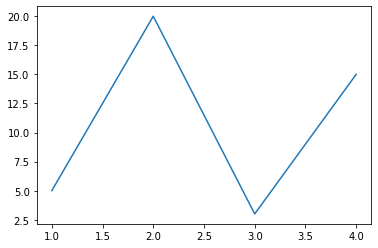

In [31]:
plt.plot(x1,x2)
plt.show()

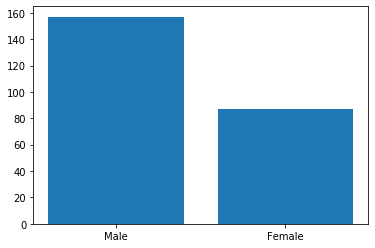

In [32]:
plt.bar(df1.sex.value_counts().index,df1.sex.value_counts().values);

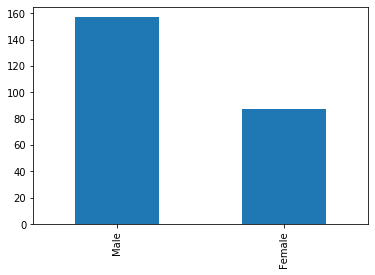

In [33]:
df1['sex'].value_counts().plot(kind='bar');

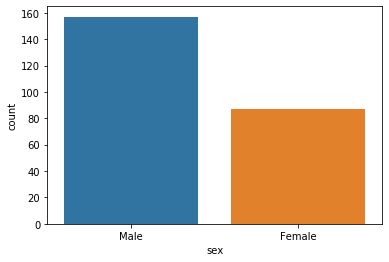

In [34]:
sns.countplot(df1['sex']);

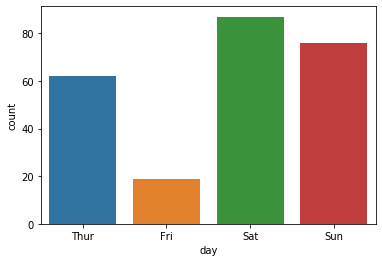

In [35]:
sns.countplot(df1['day']);

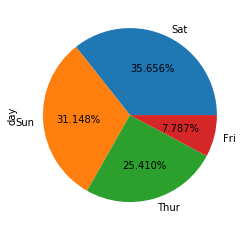

In [36]:
df1['day'].value_counts().plot(kind='pie', autopct= '%1.3f%%');

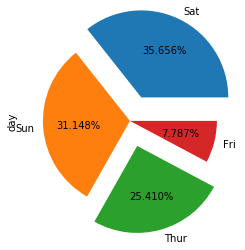

In [37]:
df1['day'].value_counts().plot(kind='pie', autopct= '%1.3f%%', explode=[0.3,0,0.3,0]);

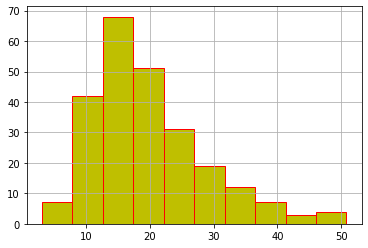

In [38]:
df1['total_bill'].hist(edgecolor='r',color='y');

Every box is called a bin and each bin width will be,
###### Range  = (Max-Min)
###### Bin Width  = Range - No. of bins

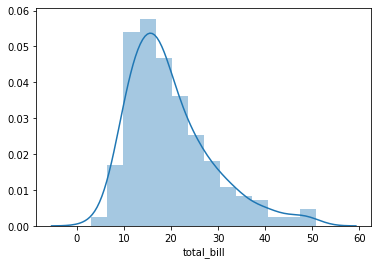

In [39]:
sns.distplot(df1['total_bill'])

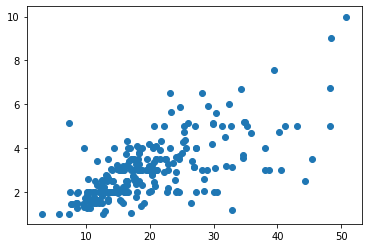

In [40]:
plt.scatter(df1['total_bill'],df1['tip']);

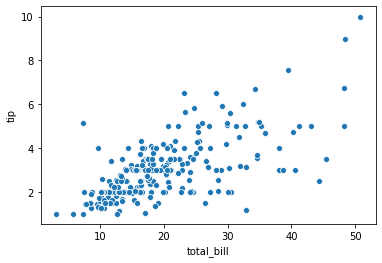

In [41]:
sns.scatterplot(x = 'total_bill', y = 'tip', data=df1);

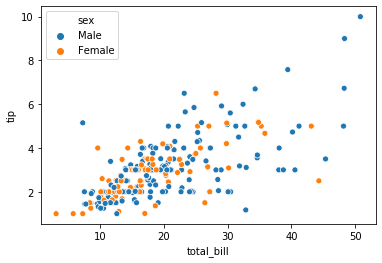

In [42]:
sns.scatterplot(x = 'total_bill', y = 'tip', data=df1, hue='sex');

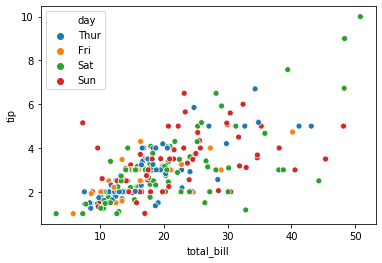

In [43]:
sns.scatterplot(x = 'total_bill', y = 'tip', data=df1, hue='day');

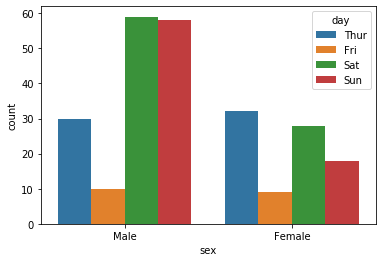

In [44]:
sns.countplot(x='sex',data=df1,hue='day')

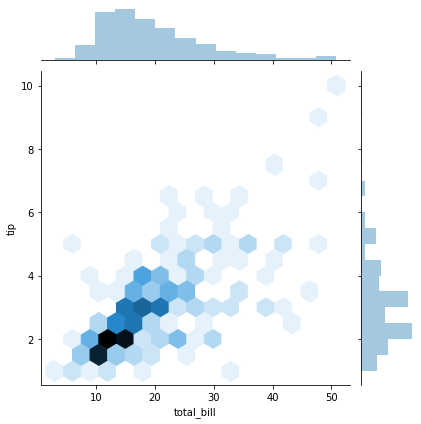

In [45]:
sns.jointplot(x = 'total_bill', y = 'tip', data=df1, kind='hex');

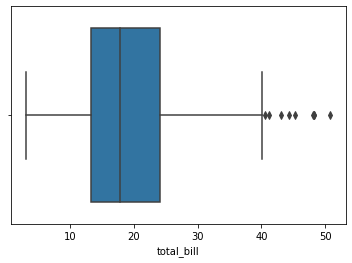

In [46]:
sns.boxplot(df1['total_bill']);

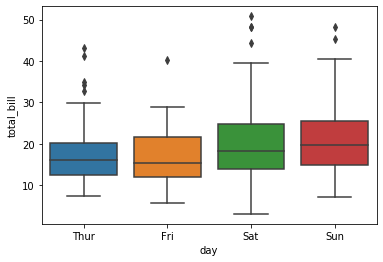

In [47]:
sns.boxplot(x='day', y='total_bill',data=df1);

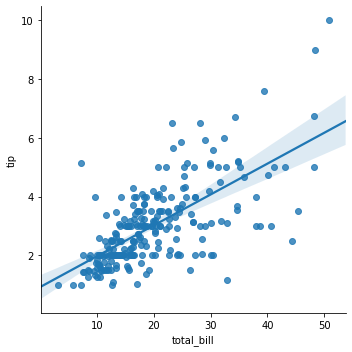

In [48]:
sns.lmplot(x='total_bill', y='tip',data=df1); # Linear Model

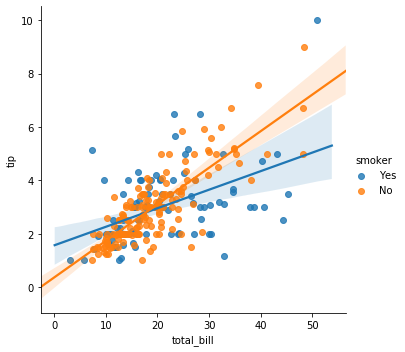

In [49]:
sns.lmplot(x='total_bill', y='tip',data=df1, hue='smoker');

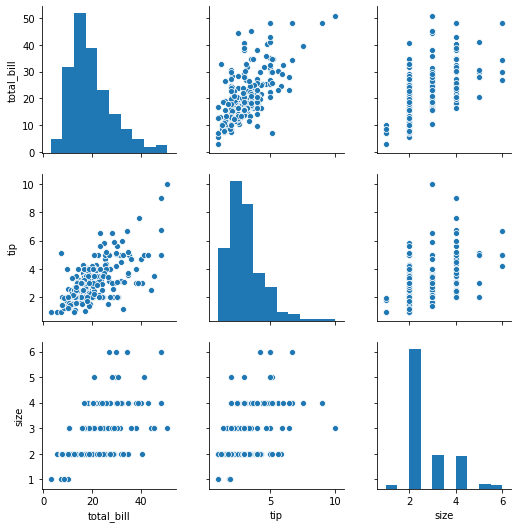

In [50]:
sns.pairplot(df1);

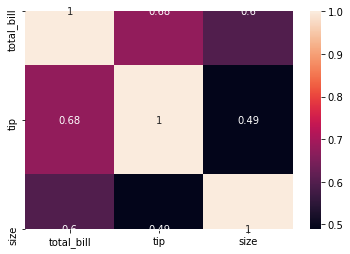

In [51]:
sns.heatmap(df1.corr(), annot=True)
# Have to update sns to fix this issue